In [135]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = r'C:\Users\OJH\OneDrive\SKKU\연구자료\Catalyst AI\New Database\Na_W_Mn_Cat_preprocess_interpolation.csv'  # Replace with the path to your file
data = pd.read_csv(file_path)

In [136]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [137]:
# Applying MinMax scaling
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

scaled_experiment_data = scaled_data[0:118]

scaled_features = scaled_experiment_data[['Temperature', 'pCH4_per_pO2', 'Contact time']]

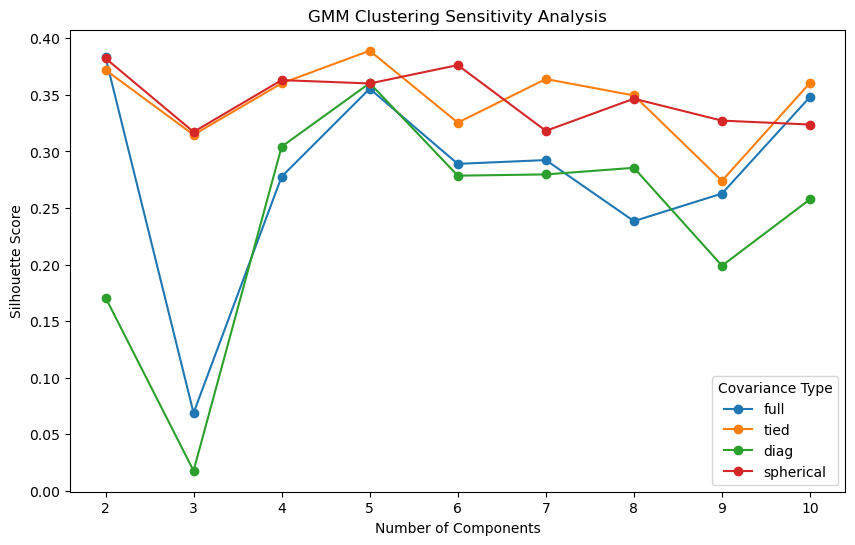

Best configuration: n_components              5
covariance_type        tied
silhouette_score    0.38901
Name: 13, dtype: object


In [139]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'scaled_features' is already defined and scaled

# Define the range of clusters to test
n_components_range = range(2, 11)  # Example: Testing 2 to 10 clusters

# Define the covariance types to test
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Initialize lists to store the results
results = []

for n_components in n_components_range:
    for covariance_type in covariance_types:
        # Initialize and fit the Gaussian Mixture Model
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
        gmm.fit(scaled_features)
        
        # Predict the cluster for each data point
        labels = gmm.predict(scaled_features)
        
        # Calculate the silhouette score for the current configuration
        silhouette_avg = silhouette_score(scaled_features, labels)
        
        # Store the results
        results.append({
            'n_components': n_components,
            'covariance_type': covariance_type,
            'silhouette_score': silhouette_avg
        })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Find the configuration with the highest silhouette score
best_config = results_df.loc[results_df['silhouette_score'].idxmax()]

# Plotting the results
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for covariance_type in covariance_types:
    subset = results_df[results_df['covariance_type'] == covariance_type]
    ax.plot(subset['n_components'], subset['silhouette_score'], marker='o', label=covariance_type)

ax.set_xlabel('Number of Components')
ax.set_ylabel('Silhouette Score')
ax.set_title('GMM Clustering Sensitivity Analysis')
ax.legend(title='Covariance Type')

plt.show()

print("Best configuration:", best_config)

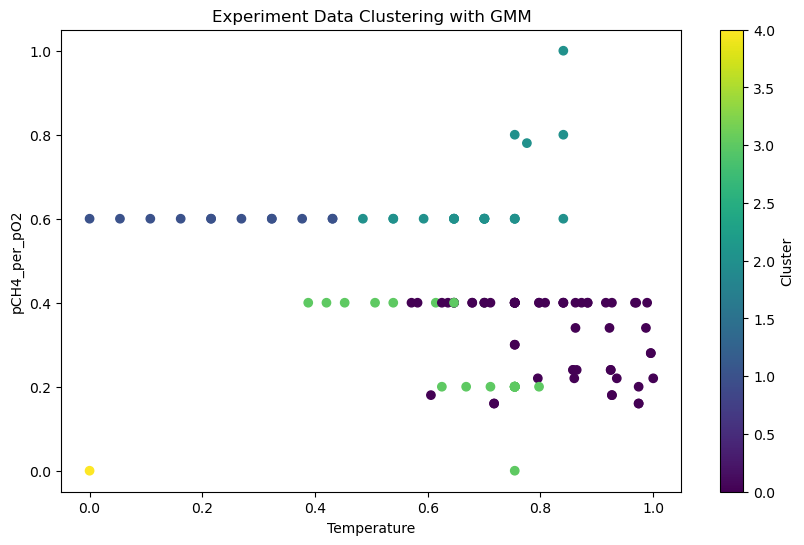

In [160]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, covariance_type='tied', random_state=42)
gmm.fit(scaled_features)

labels = gmm.predict(scaled_features)
scaled_experiment_data['Cluster'] = labels

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(scaled_experiment_data['Temperature'], scaled_experiment_data['pCH4_per_pO2'], c=scaled_experiment_data['Cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('pCH4_per_pO2')
plt.title('Experiment Data Clustering with GMM')
plt.colorbar(label='Cluster')
plt.show()

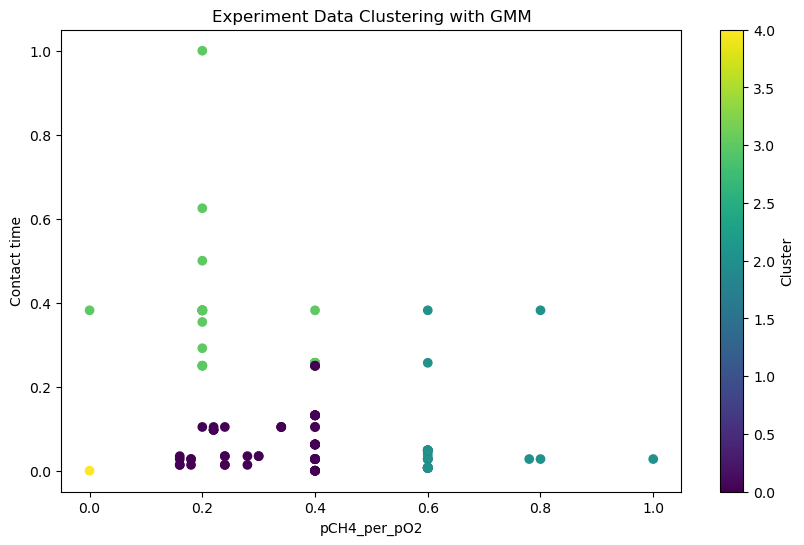

In [161]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(scaled_experiment_data['pCH4_per_pO2'], scaled_experiment_data['Contact time'], c=scaled_experiment_data['Cluster'], cmap='viridis')
plt.xlabel('pCH4_per_pO2')
plt.ylabel('Contact time')
plt.title('Experiment Data Clustering with GMM')
plt.colorbar(label='Cluster')
plt.show()

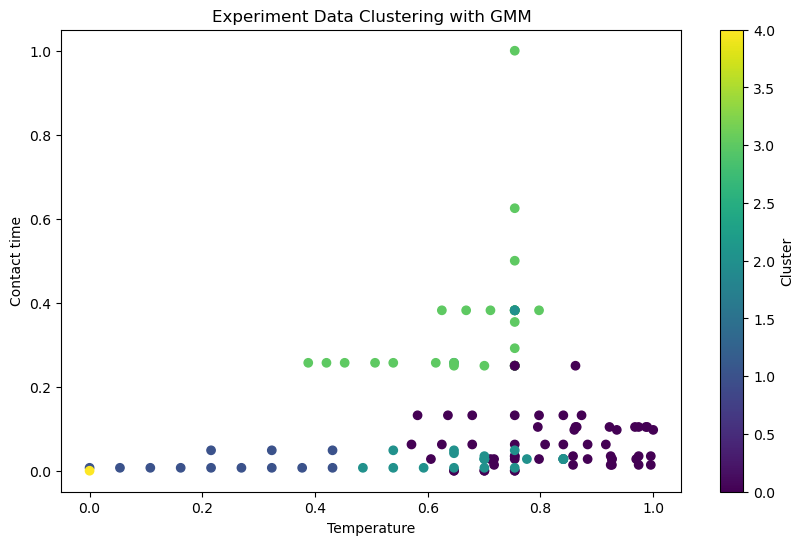

In [162]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(scaled_experiment_data['Temperature'], scaled_experiment_data['Contact time'], c=scaled_experiment_data['Cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Contact time')
plt.title('Experiment Data Clustering with GMM')
plt.colorbar(label='Cluster')
plt.show()

In [163]:
scaled_experiment_data_0 = scaled_experiment_data[scaled_experiment_data['Cluster'] == 0]
scaled_experiment_data_1 = scaled_experiment_data[scaled_experiment_data['Cluster'] == 1]
scaled_experiment_data_2 = scaled_experiment_data[scaled_experiment_data['Cluster'] == 2]
scaled_experiment_data_3 = scaled_experiment_data[scaled_experiment_data['Cluster'] == 3]
scaled_experiment_data_4 = scaled_experiment_data[scaled_experiment_data['Cluster'] == 4]

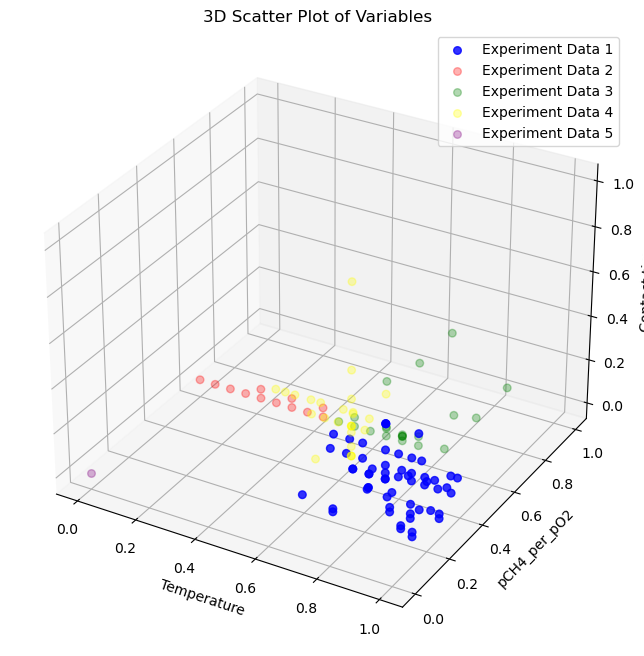

In [164]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the interpolation data with lower transparency
ax.scatter(scaled_experiment_data_0['Temperature'], scaled_experiment_data_0['pCH4_per_pO2'], scaled_experiment_data_0['Contact time'], 
           color='blue', label='Experiment Data 1', s=30, alpha=0.8)

# Plotting the extrapolation data with higher transparency
ax.scatter(scaled_experiment_data_1['Temperature'], scaled_experiment_data_1['pCH4_per_pO2'], scaled_experiment_data_1['Contact time'], 
           color='red', label='Experiment Data 2', s=30, alpha=0.3)

ax.scatter(scaled_experiment_data_2['Temperature'], scaled_experiment_data_2['pCH4_per_pO2'], scaled_experiment_data_2['Contact time'],
              color='green', label='Experiment Data 3', s=30, alpha=0.3)

ax.scatter(scaled_experiment_data_3['Temperature'], scaled_experiment_data_3['pCH4_per_pO2'], scaled_experiment_data_3['Contact time'],
              color='yellow', label='Experiment Data 4', s=30, alpha=0.3)

ax.scatter(scaled_experiment_data_4['Temperature'], scaled_experiment_data_4['pCH4_per_pO2'], scaled_experiment_data_4['Contact time'],
                color='purple', label='Experiment Data 5', s=30, alpha=0.3)

# Setting labels and title
ax.set_xlabel('Temperature')
ax.set_ylabel('pCH4_per_pO2')
ax.set_zlabel('Contact time')
ax.set_title('3D Scatter Plot of Variables')

# Adding a legend
ax.legend()

# Showing the plot
plt.show()

In [165]:
import plotly.graph_objects as go

# Assuming 'scaled_experiment_data_0' and 'scaled_experiment_data_1' are your datasets
# Replace these variable names with your actual DataFrame names
# Ensure these DataFrames have 'Temperature', 'pCH4_per_pO2', and 'Contact time' columns

fig = go.Figure()

# Adding the experiment data 1 scatter plot
fig.add_trace(go.Scatter3d(
    x=scaled_experiment_data_0['Temperature'],
    y=scaled_experiment_data_0['pCH4_per_pO2'],
    z=scaled_experiment_data_0['Contact time'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.8,  # lower opacity
        color='blue'
    ),
    name='Experiment Data 1'
))

# Adding the experiment data 2 scatter plot
fig.add_trace(go.Scatter3d(
    x=scaled_experiment_data_1['Temperature'],
    y=scaled_experiment_data_1['pCH4_per_pO2'],
    z=scaled_experiment_data_1['Contact time'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.3,  # higher opacity
        color='red'
    ),
    name='Experiment Data 2'
))

# Adding the experiment data 3 scatter plot
fig.add_trace(go.Scatter3d(
    x=scaled_experiment_data_2['Temperature'],
    y=scaled_experiment_data_2['pCH4_per_pO2'],
    z=scaled_experiment_data_2['Contact time'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.3,  # higher opacity
        color='green'
    ),
    name='Experiment Data 3'
))

# Adding the experiment data 4 scatter plot
fig.add_trace(go.Scatter3d(
    x=scaled_experiment_data_3['Temperature'],
    y=scaled_experiment_data_3['pCH4_per_pO2'],
    z=scaled_experiment_data_3['Contact time'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.3,  # higher opacity
        color='yellow'
    ),
    name='Experiment Data 4'
))

# Adding the experiment data 5 scatter plot
fig.add_trace(go.Scatter3d(
    x=scaled_experiment_data_4['Temperature'],
    y=scaled_experiment_data_4['pCH4_per_pO2'],
    z=scaled_experiment_data_4['Contact time'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.3,  # higher opacity
        color='purple'
    ),
    name='Experiment Data 5'
))

# Setting the layout for the 3D plot
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title='Temperature',
        yaxis_title='pCH4_per_pO2',
        zaxis_title='Contact time'
    ),
    title='3D Scatter Plot of Variables'
)

fig.show()

In [170]:
scaled_experiment_data_0.count()

Temperature        58
pCH4_per_pO2       58
Contact time       58
Y(C2)_predicted    58
Cluster            58
dtype: int64

In [117]:
scaled_experiment_data_0.drop(['Cluster'], axis=1, inplace=True)
scaled_experiment_data_1.drop(['Cluster'], axis=1, inplace=True)

scaled_experiment_data_0_original = scaler.inverse_transform(scaled_experiment_data_0)
scaled_experiment_data_1_original = scaler.inverse_transform(scaled_experiment_data_1)

In [118]:
scaled_experiment_data_0=pd.DataFrame(scaled_experiment_data_0_original, columns=scaled_experiment_data_0.columns)
scaled_experiment_data_0

,Temperature,pCH4_per_pO2,Contact time,Y(C2)_predicted
0,1092.0,2.1,0.15,16.146929
1,1124.0,2.2,0.15,17.852878
2,1175.0,2.0,0.15,23.288527
3,1123.0,2.7,0.15,17.690870
4,1151.0,2.7,0.15,20.950115
...,...,...,...,...
77,1023.0,3.0,0.00,16.001864
78,1073.0,2.0,0.36,19.644922
79,1023.0,3.0,0.36,14.236753
80,1073.0,3.0,0.36,16.694627


In [119]:
scaled_experiment_data_1_original=pd.DataFrame(scaled_experiment_data_1_original, columns=scaled_experiment_data_1.columns)
scaled_experiment_data_1_original

,Temperature,pCH4_per_pO2,Contact time,Y(C2)_predicted
0,1083.0,4.9,0.04,12.047283
1,1023.0,4.0,0.06,7.919782
2,1073.0,5.0,0.55,13.831947
3,1023.0,4.0,0.37,7.904139
4,903.0,3.0,0.37,0.427436
5,918.0,3.0,0.37,0.427436
6,933.0,3.0,0.37,1.461191
7,1113.0,4.0,0.04,13.370256
8,1113.0,5.0,0.04,12.560559
9,1113.0,6.0,0.04,12.560559


In [22]:
# Function to calculate the section index for each data point
def calculate_section_index(value, num_sections):
    return int(value * num_sections)

# Number of sections
num_sections = 20

# Adding section indices for each variable
scaled_data['Temperature_section'] = scaled_data['Temperature'].apply(lambda x: calculate_section_index(x, num_sections))
scaled_data['pCH4_per_pO2_section'] = scaled_data['pCH4_per_pO2'].apply(lambda x: calculate_section_index(x, num_sections))
scaled_data['Contact_time_section'] = scaled_data['Contact time'].apply(lambda x: calculate_section_index(x, num_sections))

# Counting the number of data points in each section for each variable
temp_section_counts = scaled_data['Temperature_section'].value_counts().sort_index()
pCH4_section_counts = scaled_data['pCH4_per_pO2_section'].value_counts().sort_index()
contact_time_section_counts = scaled_data['Contact_time_section'].value_counts().sort_index()

# Creating a DataFrame with section counts
section_counts = pd.DataFrame({
    'Temperature': temp_section_counts, 
    'pCH4_per_pO2': pCH4_section_counts, 
    'Contact time': contact_time_section_counts
})

# Display the section counts
print(section_counts)

    Temperature  pCH4_per_pO2  Contact time
0           442         883.0         940.0
1           442           NaN         452.0
2           442         441.0          15.0
3           883         448.0         882.0
4             2         466.0         450.0
5           442         443.0           9.0
6           443         446.0         441.0
7           443         441.0         894.0
8           444         485.0           NaN
9           443         441.0         883.0
10          445         441.0           NaN
11          444         441.0         441.0
12          895         470.0         442.0
13            3         441.0         441.0
14          453         441.0         441.0
15          473         442.0         882.0
16          448         443.0           NaN
17          450         441.0         441.0
18          449         441.0         441.0
19          450         441.0         883.0
20          442         442.0           NaN


In [48]:
# %%
# Function to calculate a combined section index for each data point based on three variables
def calculate_combined_section_index(row, num_sections):
    temp_index = int(row['Temperature'] * num_sections)
    pCH4_index = int(row['pCH4_per_pO2'] * num_sections)
    contact_time_index = int(row['Contact time'] * num_sections)
    return (temp_index, pCH4_index, contact_time_index)

# Number of sections
num_sections = 20

# Adding combined section indices
scaled_data['Combined_Section'] = scaled_data.apply(lambda row: calculate_combined_section_index(row, num_sections), axis=1)

# Counting the number of data points in each combined section
combined_section_counts = scaled_data['Combined_Section'].value_counts().sort_index()

# Display the counts
print(combined_section_counts.head())
# %%
# Function to calculate a combined section index for each data point based on three variables
# Define a function to calculate section indices for each variable
def calculate_section_index(value, num_sections):
    return int(value * num_sections)

num_sections = 20  # Number of sections
min_section_count_threshold = 5  # Minimum count to consider a section high-frequency

# Calculate section indices for each variable
scaled_data['Temp_Section'] = scaled_data['Temperature'].apply(lambda x: calculate_section_index(x, num_sections))
scaled_data['pCH4_Section'] = scaled_data['pCH4_per_pO2'].apply(lambda x: calculate_section_index(x, num_sections))
scaled_data['Contact_Section'] = scaled_data['Contact time'].apply(lambda x: calculate_section_index(x, num_sections))

# Count data points in each section for each variable
temp_section_counts = scaled_data['Temp_Section'].value_counts()
pCH4_section_counts = scaled_data['pCH4_Section'].value_counts()
contact_section_counts = scaled_data['Contact_Section'].value_counts()

# Finding the sections with the highest counts that are continuous
def find_continuous_high_freq_sections(section_counts, min_count_threshold):
    continuous_sections = []
    temp_section = []
    sorted_sections = sorted(section_counts.items(), key=lambda x: x[0])

    for section, count in sorted_sections:
        if count >= min_count_threshold:
            if not temp_section or section == temp_section[-1] + 1:
                temp_section.append(section)
            else:
                continuous_sections.append(temp_section)
                temp_section = [section]
        else:
            if temp_section:
                continuous_sections.append(temp_section)
                temp_section = []

    if temp_section:
        continuous_sections.append(temp_section)

    return max(continuous_sections, key=len) if continuous_sections else []


# Finding continuous high-frequency sections for each variable
temp_continuous_high_freq = find_continuous_high_freq_sections(temp_section_counts, min_section_count_threshold)
pCH4_continuous_high_freq = find_continuous_high_freq_sections(pCH4_section_counts, min_section_count_threshold)
contact_time_continuous_high_freq = find_continuous_high_freq_sections(contact_time_section_counts, min_section_count_threshold)

# Displaying the high-frequency sections for each variable
temp_continuous_high_freq, pCH4_continuous_high_freq, contact_time_continuous_high_freq

(0, 0, 0)    4
(0, 0, 1)    2
(0, 0, 3)    4
(0, 0, 4)    2
(0, 0, 6)    2
Name: Combined_Section, dtype: int64


([5, 6, 7, 8, 9, 10, 11, 12],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [0, 1, 2, 3, 4, 5, 6, 7])

In [49]:
# %%
interpolation_mask = (
    scaled_data['Temperature_section'].apply(lambda x: x in temp_continuous_high_freq) &
    scaled_data['pCH4_per_pO2_section'].apply(lambda x: x in pCH4_continuous_high_freq) &
    scaled_data['Contact_time_section'].apply(lambda x: x in contact_time_continuous_high_freq)
)

# Extrapolation mask: include data points where at least one variable is outside its high-frequency section
extrapolation_mask = ~interpolation_mask

# Splitting the data into interpolation and extrapolation sets
interpolation_data = scaled_data[interpolation_mask]
extrapolation_data = scaled_data[extrapolation_mask]

# Displaying the number of data points in each set
interpolation_data_count = len(interpolation_data)
extrapolation_data_count = len(extrapolation_data)

print("Interpolation Data Count:", interpolation_data_count)
print("Extrapolation Data Count:", extrapolation_data_count)

Interpolation Data Count: 1569
Extrapolation Data Count: 7809


In [50]:
experiment_interpolation_overlap = interpolation_mask[:116].sum()
experiment_extrapolation_overlap = extrapolation_mask[:116].sum()

experiment_interpolation_overlap, experiment_extrapolation_overlap

(30, 86)

[5, 6, 7, 8, 9, 10, 11, 12] [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [0, 1, 2, 3, 4, 5, 6, 7]
0       True
1       True
2       True
3       True
4       True
        ... 
9373    True
9374    True
9375    True
9376    True
9377    True
Length: 9378, dtype: bool


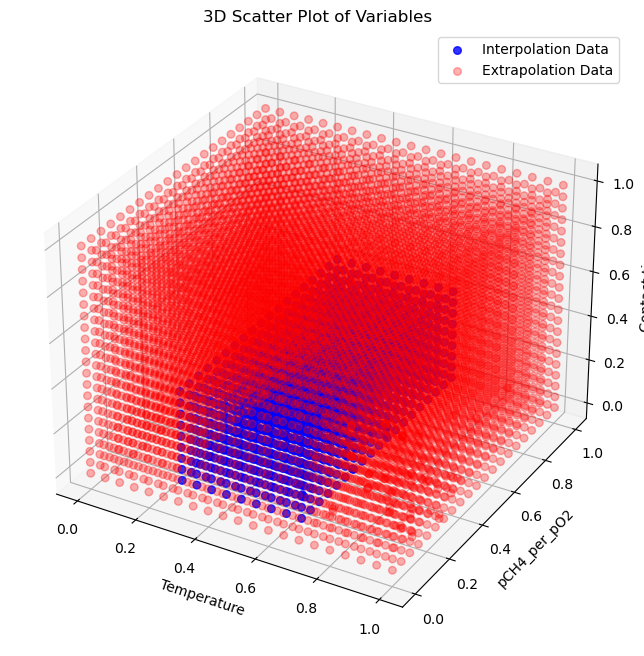

In [51]:
# %%
print(temp_continuous_high_freq, pCH4_continuous_high_freq, contact_time_continuous_high_freq)
print(extrapolation_mask)
# %%
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the interpolation data with lower transparency
ax.scatter(interpolation_data['Temperature'], interpolation_data['pCH4_per_pO2'], interpolation_data['Contact time'], 
           color='blue', label='Interpolation Data', s=30, alpha=0.8)

# Plotting the extrapolation data with higher transparency
ax.scatter(extrapolation_data['Temperature'], extrapolation_data['pCH4_per_pO2'], extrapolation_data['Contact time'], 
           color='red', label='Extrapolation Data', s=30, alpha=0.3)

# Setting labels and title
ax.set_xlabel('Temperature')
ax.set_ylabel('pCH4_per_pO2')
ax.set_zlabel('Contact time')
ax.set_title('3D Scatter Plot of Variables')

# Adding a legend
ax.legend()

# Showing the plot
plt.show()

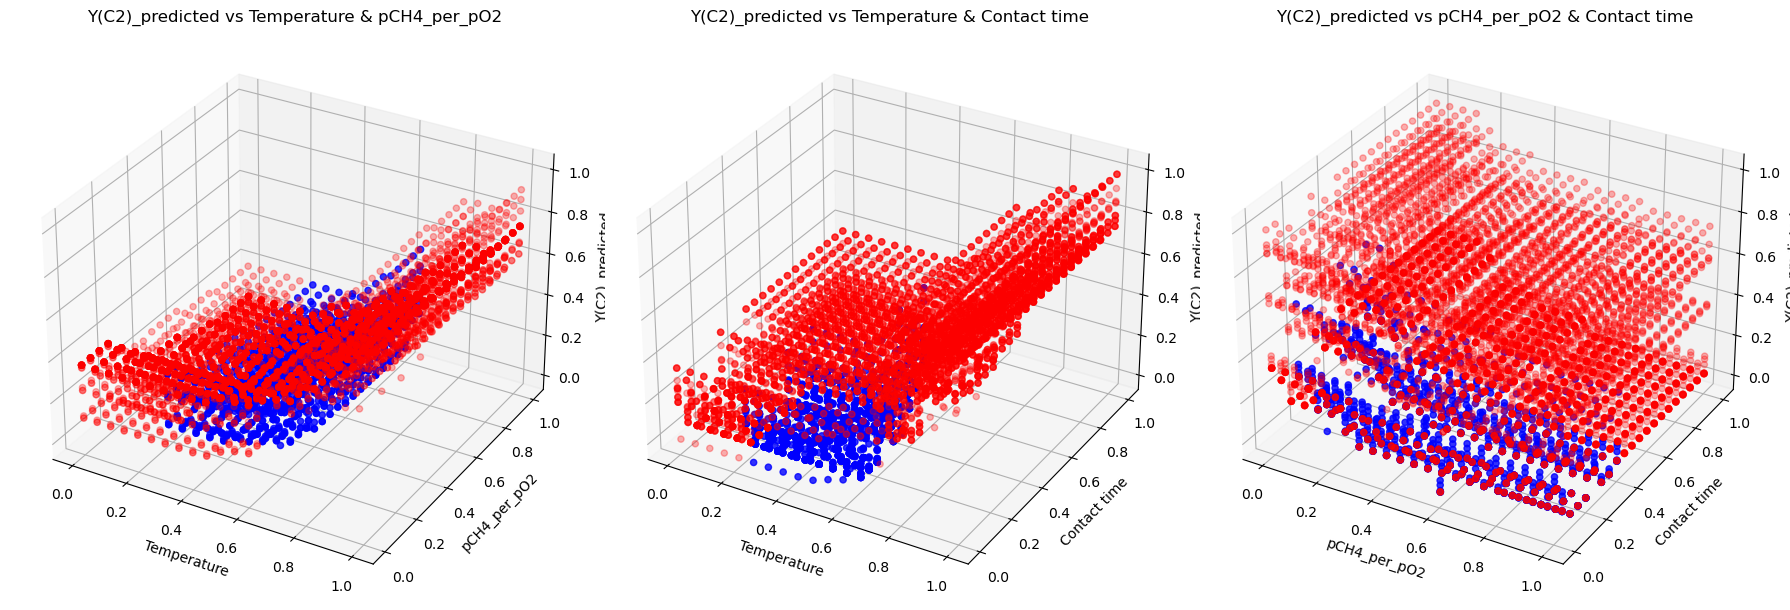

In [6]:
# %%
# Creating 3D scatter plots
fig = plt.figure(figsize=(18, 6))

# Y(C2)_predicted vs Temperature and pCH4_per_pO2
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(interpolation_data['Temperature'], interpolation_data['pCH4_per_pO2'], interpolation_data['Y(C2)_predicted'], color='blue', alpha=0.8)
ax1.scatter(extrapolation_data['Temperature'], extrapolation_data['pCH4_per_pO2'], extrapolation_data['Y(C2)_predicted'], color='red', alpha=0.3)
ax1.set_xlabel('Temperature')
ax1.set_ylabel('pCH4_per_pO2')
ax1.set_zlabel('Y(C2)_predicted')
ax1.set_title('Y(C2)_predicted vs Temperature & pCH4_per_pO2')

# Y(C2)_predicted vs Temperature and Contact time
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(interpolation_data['Temperature'], interpolation_data['Contact time'], interpolation_data['Y(C2)_predicted'], color='blue', alpha=0.8)
ax2.scatter(extrapolation_data['Temperature'], extrapolation_data['Contact time'], extrapolation_data['Y(C2)_predicted'], color='red', alpha=0.3)
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Contact time')
ax2.set_zlabel('Y(C2)_predicted')
ax2.set_title('Y(C2)_predicted vs Temperature & Contact time')

# Y(C2)_predicted vs pCH4_per_pO2 and Contact time
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(interpolation_data['pCH4_per_pO2'], interpolation_data['Contact time'], interpolation_data['Y(C2)_predicted'], color='blue', alpha=0.8)
ax3.scatter(extrapolation_data['pCH4_per_pO2'], extrapolation_data['Contact time'], extrapolation_data['Y(C2)_predicted'], color='red', alpha=0.3)
ax3.set_xlabel('pCH4_per_pO2')
ax3.set_ylabel('Contact time')
ax3.set_zlabel('Y(C2)_predicted')
ax3.set_title('Y(C2)_predicted vs pCH4_per_pO2 & Contact time')

plt.tight_layout()
plt.show()

In [7]:
# %%
scaler = MinMaxScaler()
scaler.fit(data[['Temperature', 'pCH4_per_pO2', 'Contact time', 'Y(C2)_predicted']])
original_data = pd.DataFrame(scaler.inverse_transform(scaled_data[['Temperature', 'pCH4_per_pO2', 'Contact time', 'Y(C2)_predicted']]), columns=data.columns)

# Separating the train and test sets based on the original mask
original_train_set = original_data[interpolation_mask]
original_test_set = original_data[extrapolation_mask]

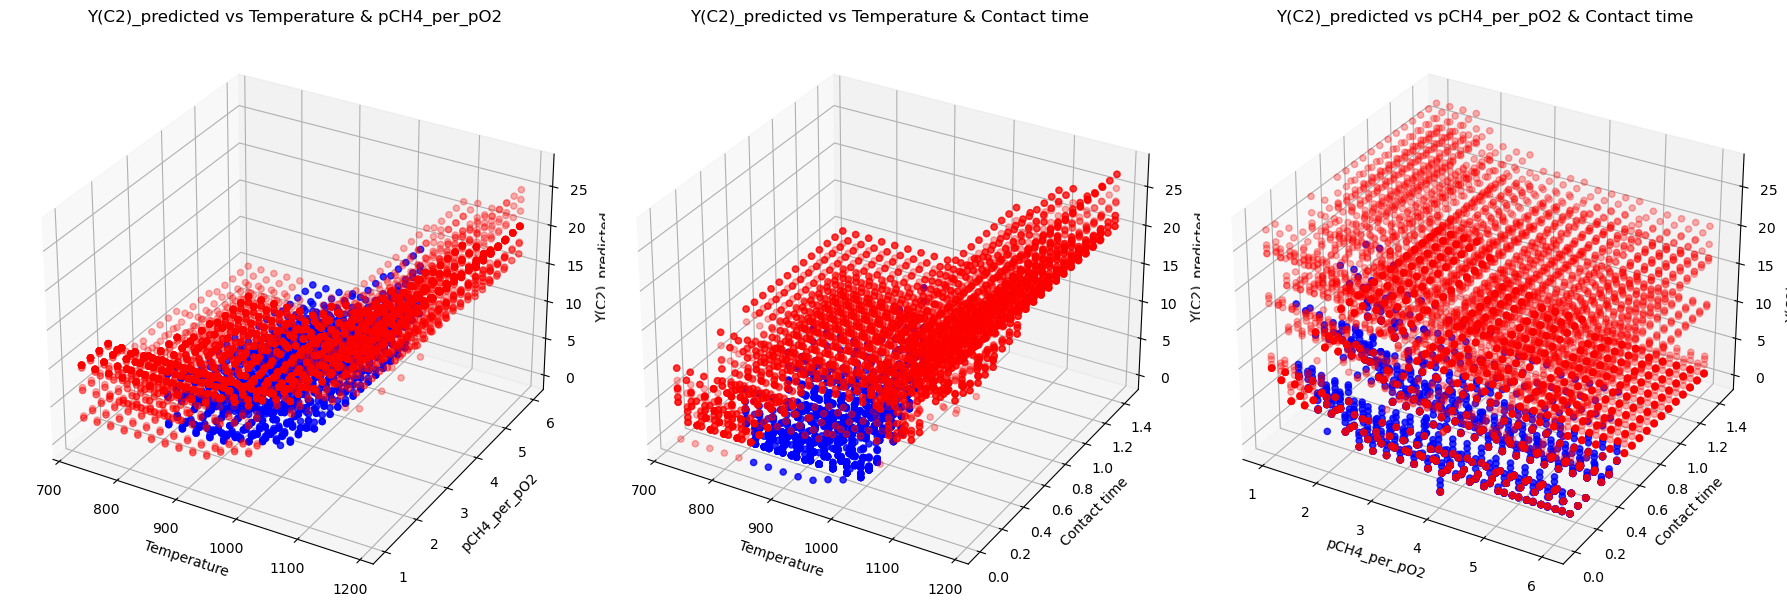

In [8]:
# %%
original_train_set = original_data[interpolation_mask]
original_test_set = original_data[extrapolation_mask]
# %%
# Creating 3D scatter plots
fig = plt.figure(figsize=(18, 6))

# Y(C2)_predicted vs Temperature and pCH4_per_pO2
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(original_train_set['Temperature'], original_train_set['pCH4_per_pO2'], original_train_set['Y(C2)_predicted'], color='blue', alpha=0.8)
ax1.scatter(original_test_set['Temperature'], original_test_set['pCH4_per_pO2'], original_test_set['Y(C2)_predicted'], color='red', alpha=0.3)
ax1.set_xlabel('Temperature')
ax1.set_ylabel('pCH4_per_pO2')
ax1.set_zlabel('Y(C2)_predicted')
ax1.set_title('Y(C2)_predicted vs Temperature & pCH4_per_pO2')

# Y(C2)_predicted vs Temperature and Contact time
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(original_train_set['Temperature'], original_train_set['Contact time'], original_train_set['Y(C2)_predicted'], color='blue', alpha=0.8)
ax2.scatter(original_test_set['Temperature'], original_test_set['Contact time'], original_test_set['Y(C2)_predicted'], color='red', alpha=0.3)
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Contact time')
ax2.set_zlabel('Y(C2)_predicted')
ax2.set_title('Y(C2)_predicted vs Temperature & Contact time')

# Y(C2)_predicted vs pCH4_per_pO2 and Contact time
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(original_train_set['pCH4_per_pO2'], original_train_set['Contact time'], original_train_set['Y(C2)_predicted'], color='blue', alpha=0.8)
ax3.scatter(original_test_set['pCH4_per_pO2'], original_test_set['Contact time'], original_test_set['Y(C2)_predicted'], color='red', alpha=0.3)
ax3.set_xlabel('pCH4_per_pO2')
ax3.set_ylabel('Contact time')
ax3.set_zlabel('Y(C2)_predicted')
ax3.set_title('Y(C2)_predicted vs pCH4_per_pO2 & Contact time')

plt.tight_layout()
plt.show()

In [17]:
interpolation_data = pd.read_csv(r'C:\Users\OJH\OneDrive\SKKU\연구자료\Catalyst AI_rev\New Database\Na_W_Mn_train.csv')
extrapolation_data = pd.read_csv(r'C:\Users\OJH\OneDrive\SKKU\연구자료\Catalyst AI_rev\New Database\Na_W_Mn_test.csv')
experiment_data = pd.read_csv(r'C:\Users\OJH\OneDrive\SKKU\연구자료\Catalyst AI_rev\New Database\Na_W_Mn_Cat_preprocess_interpolation.csv')[0:116]

In [18]:
# Remove 'Unnamed: 0' column from each dataset for comparison
experiment_data_no_id = experiment_data.drop(columns=['Unnamed: 0'])
interpolation_data_no_id = interpolation_data.drop(columns=['Unnamed: 0'])
extrapolation_data_no_id = extrapolation_data.drop(columns=['Unnamed: 0'])

# Check for duplicates based on the remaining columns
# Here, we convert dataframes to tuples for each row to facilitate comparison
experiment_data_tuples = set([tuple(row) for row in experiment_data_no_id.values])
interpolation_data_tuples = set([tuple(row) for row in interpolation_data_no_id.values])
extrapolation_data_tuples = set([tuple(row) for row in extrapolation_data_no_id.values])

# Calculate overlaps
overlap_with_interpolation_no_id = len(experiment_data_tuples.intersection(interpolation_data_tuples))
overlap_with_extrapolation_no_id = len(experiment_data_tuples.intersection(extrapolation_data_tuples))

overlap_with_interpolation_no_id, overlap_with_extrapolation_no_id

(15, 48)